<a href="https://colab.research.google.com/github/Salwazd21/Proyek-ADP-Dicoding/blob/main/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Salwa Zahrah Dasuki]
- **Email:** [Salwazd2004@gmail.com]
- **ID Dicoding:** [MC849D5X0945]

## Menentukan Pertanyaan Bisnis

- Berapa persen pengguna sepedah pada beberapabulan terakhir
- Kapan puncak tertinggi penyewaan sepeda pada 1 tahun terakhir

## Import Semua Packages/Library yang Digunakan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [7]:
day_df = pd.read_csv("https://raw.githubusercontent.com/Salwazd21/Proyek-ADP-Dicoding/refs/heads/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [8]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/Salwazd21/Proyek-ADP-Dicoding/refs/heads/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Data day_csv berisi data ringkasan harian
- Data hour_csv berisi data ringkasan perjam

### Assessing Data

####Data day_df

In [9]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [10]:
#Memeriksa nilai unik
print(day_df['season'].unique())
print(day_df['yr'].unique())
print(day_df['mnth'].unique())
print(day_df['holiday'].unique())
print(day_df['weekday'].unique())
print(day_df['workingday'].unique())
print(day_df['weathersit'].unique())

[1 2 3 4]
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[0 1]
[6 0 1 2 3 4 5]
[0 1]
[2 1 3]


In [11]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [12]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [13]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


####Data Hour_df

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
#Memeriksa nilai unik
print(hour_df['season'].unique())
print(hour_df['yr'].unique())
print(hour_df['mnth'].unique())
print(hour_df['holiday'].unique())
print(hour_df['weekday'].unique())
print(hour_df['workingday'].unique())

[1 2 3 4]
[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[0 1]
[6 0 1 2 3 4 5]
[0 1]


In [16]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [17]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [18]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Data day_df:
 - tipe data untuk dteday kurang tepat
 - terdapat data outlier
- Data hour_df:
  - tipe data dteday kurang tepat

### Cleaning Data

####Data Day_df

Mengganti tipe data dteday dari object menjadi datetime

In [19]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
print(day_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Menentukan ambang batas outlier dengan metode IQR

In [20]:
Q1_casual = day_df['casual'].quantile(0.25)
Q3_casual = day_df['casual'].quantile(0.75)
IQR_casual = Q3_casual - Q1_casual
batas_casual = Q3_casual + 1.5 * IQR_casual

Q1_registered = day_df['registered'].quantile(0.25)
Q3_registered = day_df['registered'].quantile(0.75)
IQR_registered = Q3_registered - Q1_registered
batas_registered = Q3_registered + 1.5 * IQR_registered

Q1_cnt = day_df['cnt'].quantile(0.25)
Q3_cnt = day_df['cnt'].quantile(0.75)
IQR_cnt = Q3_cnt - Q1_cnt
batas_cnt = Q3_cnt + 1.5 * IQR_cnt

Q1_windspeed = day_df['windspeed'].quantile(0.25)
Q3_windspeed = day_df['windspeed'].quantile(0.75)
IQR_windspeed = Q3_windspeed - Q1_windspeed
batas_windspeed = Q3_windspeed + 1.5 * IQR_windspeed

print(f"Batas casual: {batas_casual}")
print(f"Batas registered: {batas_registered}")
print(f"Batas cnt: {batas_cnt}")
print(f"Batas windspeed: {batas_windspeed}")

Batas casual: 2266.75
Batas registered: 8195.75
Batas cnt: 10162.0
Batas windspeed: 0.38061125


Melakukan pembersihan pada data outlier

In [21]:
day_df_cleaned = day_df[
    (day_df['casual'] < batas_casual) &
    (day_df['registered'] < batas_registered) &
    (day_df['cnt'] < batas_cnt) &
    (day_df['windspeed'] < batas_windspeed)
]

print(f"Jumlah baris sebelum pembersihan: {len(day_df)}")
print(f"Jumlah baris setelah pembersihan: {len(day_df_cleaned)}")

Jumlah baris sebelum pembersihan: 731
Jumlah baris setelah pembersihan: 674


In [22]:
print(day_df_cleaned.describe())

          instant                         dteday      season          yr  \
count  674.000000                            674  674.000000  674.000000   
mean   357.560831  2011-12-23 13:27:35.786350080    2.501484    0.474777   
min      1.000000            2011-01-01 00:00:00    1.000000    0.000000   
25%    174.250000            2011-06-23 06:00:00    1.000000    0.000000   
50%    348.500000            2011-12-14 12:00:00    3.000000    0.000000   
75%    544.750000            2012-06-27 18:00:00    3.750000    1.000000   
max    731.000000            2012-12-31 00:00:00    4.000000    1.000000   
std    212.243230                            NaN    1.124163    0.499734   

             mnth     holiday     weekday  workingday  weathersit        temp  \
count  674.000000  674.000000  674.000000  674.000000  674.000000  674.000000   
mean     6.551929    0.026706    2.964392    0.728487    1.406528    0.489271   
min      1.000000    0.000000    0.000000    0.000000    1.000000    0.0

In [23]:
baris_dihapus = day_df[~day_df.index.isin(day_df_cleaned.index)]
print(baris_dihapus)

     instant     dteday  season  yr  mnth  holiday  weekday  workingday  \
44        45 2011-02-14       1   0     2        0        1           1   
49        50 2011-02-19       1   0     2        0        6           0   
93        94 2011-04-04       2   0     4        0        1           1   
94        95 2011-04-05       2   0     4        0        2           1   
148      149 2011-05-29       2   0     5        0        0           0   
183      184 2011-07-03       3   0     7        0        0           0   
184      185 2011-07-04       3   0     7        1        1           0   
196      197 2011-07-16       3   0     7        0        6           0   
246      247 2011-09-04       3   0     9        0        0           0   
281      282 2011-10-09       4   0    10        0        0           0   
292      293 2011-10-20       4   0    10        0        4           1   
382      383 2012-01-18       1   1     1        0        3           1   
407      408 2012-02-12  

In [24]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


####Data hour_df

In [25]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

Membersihkan data outlier pada hour_df

In [26]:
Q1_casual = hour_df['casual'].quantile(0.25)
Q3_casual = hour_df['casual'].quantile(0.75)
IQR_casual = Q3_casual - Q1_casual
batas_casual = Q3_casual + 1.5 * IQR_casual

Q1_registered = hour_df['registered'].quantile(0.25)
Q3_registered = hour_df['registered'].quantile(0.75)
IQR_registered = Q3_registered - Q1_registered
batas_registered = Q3_registered + 1.5 * IQR_registered

Q1_cnt = hour_df['cnt'].quantile(0.25)
Q3_cnt = hour_df['cnt'].quantile(0.75)
IQR_cnt = Q3_cnt - Q1_cnt
batas_cnt = Q3_cnt + 1.5 * IQR_cnt

Q1_windspeed = hour_df['windspeed'].quantile(0.25)
Q3_windspeed = hour_df['windspeed'].quantile(0.75)
IQR_windspeed = Q3_windspeed - Q1_windspeed
batas_windspeed = Q3_windspeed + 1.5 * IQR_windspeed

print(f"Batas casual: {batas_casual}")
print(f"Batas registered: {batas_registered}")
print(f"Batas cnt: {batas_cnt}")
print(f"Batas windspeed: {batas_windspeed}")

hour_df_cleaned = hour_df[
    (hour_df['casual'] < batas_casual) &
    (hour_df['registered'] < batas_registered) &
    (hour_df['cnt'] < batas_cnt) &
    (hour_df['windspeed'] < batas_windspeed)
]

print(f"Jumlah baris sebelum pembersihan: {len(hour_df)}")
print(f"Jumlah baris setelah pembersihan: {len(hour_df_cleaned)}")

Batas casual: 114.0
Batas registered: 499.0
Batas cnt: 642.5
Batas windspeed: 0.4775
Jumlah baris sebelum pembersihan: 17379
Jumlah baris setelah pembersihan: 15224


**Insight:**
- Memperbaiki tipe data untuk dteday dan membersihkan data outlier pada dataset day_df
  Potensi outlier pada kolom-kolom berikut:
  - casual: Nilai maksimum (3410) jauh lebih tinggi daripada kuartil ke-75 (1096).
  - registered: Nilai maksimum (6946) jauh lebih tinggi daripada kuartil ke-75 (4776.5).
  - cnt: Nilai maksimum (8714) jauh lebih tinggi daripada kuartil ke-75 (5956).
  - windspeed: Nilai maksimum (0.507463) juga relatif tinggi dibandingkan dengan kuartil ke-75 (0.2332145).
- Memperbaiki tipe data dteday dan membersihkan data outlier
  Data potensi outlier:
  - casual: Nilai maksimum (367) jauh lebih tinggi daripada kuartil ke-75 (48).
  - registered: Nilai maksimum (886) jauh lebih tinggi daripada kuartil ke-75 (220).
  - cnt: Nilai maksimum (977) jauh lebih tinggi daripada kuartil ke-75 (281).
  - windspeed: Nilai maksimum (0.8507) juga relatif tinggi dibandingkan dengan kuartil ke-75 (0.2537).

## Exploratory Data Analysis (EDA)

### Explore Data Day_df

In [27]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>]], dtype=object)

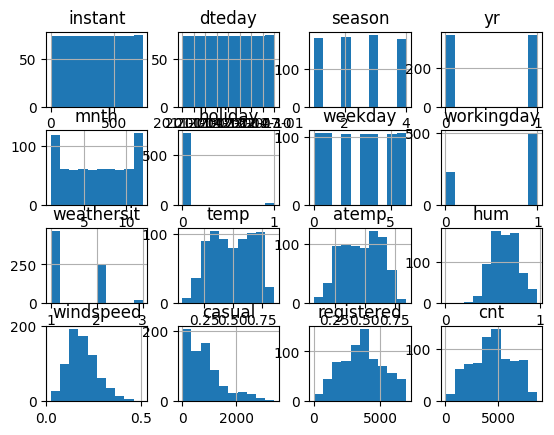

In [28]:
day_df.hist()

In [29]:
day_df.corr()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
dteday,1.000000,1.000000,0.412224,0.866025,0.496702,0.016145,-0.000016,-0.004337,-0.021477,0.150580,0.152638,0.016375,-0.112620,0.275255,0.659623,0.628830
season,0.412224,0.412224,1.000000,-0.001844,0.831440,-0.010537,-0.003080,0.012485,0.019211,0.334315,0.342876,0.205445,-0.229046,0.210399,0.411623,0.406100
yr,0.866025,0.866025,-0.001844,1.000000,-0.001792,0.007954,-0.005461,-0.002013,-0.048727,0.047604,0.046106,-0.110651,-0.011817,0.248546,0.594248,0.566710
mnth,0.496702,0.496702,0.831440,-0.001792,1.000000,0.019191,0.009509,-0.005901,0.043528,0.220205,0.227459,0.222204,-0.207502,0.123006,0.293488,0.279977
holiday,0.016145,0.016145,-0.010537,0.007954,0.019191,1.000000,-0.101960,-0.253023,-0.034627,-0.028556,-0.032507,-0.015937,0.006292,0.054274,-0.108745,-0.068348
weekday,-0.000016,-0.000016,-0.003080,-0.005461,0.009509,-0.101960,1.000000,0.035790,0.031087,-0.000170,-0.007537,-0.052232,0.014282,0.059923,0.057367,0.067443
workingday,-0.004337,-0.004337,0.012485,-0.002013,-0.005901,-0.253023,0.035790,1.000000,0.061200,0.052660,0.052182,0.024327,-0.018796,-0.518044,0.303907,0.061156
weathersit,-0.021477,-0.021477,0.019211,-0.048727,0.043528,-0.034627,0.031087,0.061200,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,0.150580,0.150580,0.334315,0.047604,0.220205,-0.028556,-0.000170,0.052660,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494


Pengelompokkan data

In [30]:
day_df.groupby(by='mnth').agg({
    'casual': ["max","min","mean","std"],
    'registered': ["max","min","mean","std"],
    'cnt': ["max","min","mean","std"]
})

casual                               registered                     \
        max  min         mean         std        max   min         mean   
mnth                                                                      
1      1070    9   194.225806  197.384490       4185   416  1982.112903   
2      1435   47   262.508772  232.283549       4546   905  2392.789474   
3      3155   46   716.838710  624.308094       5893   491  2975.419355   
4      3252  120  1013.366667  738.345585       5950   674  3471.533333   
5      3410  255  1214.274194  754.950311       6433  2213  4135.500000   
6      2963  477  1231.766667  664.017647       6456  2993  4540.600000   
7      3065  562  1260.596774  598.382778       6790  2298  4303.080645   
8      2827  226  1161.919355  466.576274       6541   889  4502.500000   
9      3160  118  1172.050000  738.378375       6946  1689  4594.466667   
10     3031    2   963.870968  703.205576       6911    20  4235.354839   
11     2290   69   610.050000  470.933096       5520   935  3637.133333   
12     1153    9   349.887097  222.634531       6055   432  3053.919355   

                    cnt                                  
              std   max   min         mean          std  
mnth                                                     
1     1053.274474  4521   431  2176.338710  1161.674370  
2     1091.126003  5062  1005  2655.298246  1145.313307  
3     1513.254354  8362   605  3692.258065  1899.301812  
4     1414.571151  7460   795  4484.900000  1776.160778  
5     1093.179612  8294  2633  5349.774194  1298.711561  
6     1012.958885  8120  3767  5772.366667  1240.400031  
7     1190.542490  8173  3285  5563.677419  1273.751871  
8     1335.126601  7865  1115  5664.419355  1494.516146  
9     1547.716749  8714  1842  5766.516667  1810.130649  
10    1685.022519  8156    22  5199.225806  1988.392517  
11    1219.589045  6852  1495  4247.183333  1285.712709  
12    1465.052959  6606   441  3403.806452  1549.639353

In [31]:
day_df.groupby(by='cnt').dteday.nunique().sort_values(ascending=False)

,dteday
cnt,
5698,2
4401,2
1162,2
4195,2
4073,2
...,...
3761,1
3767,1
3777,1


###Explore Data Hour_df

In [32]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'mnth'}>, <Axes: title={'center': 'hr'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'weekday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weathersit'}>,
        <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

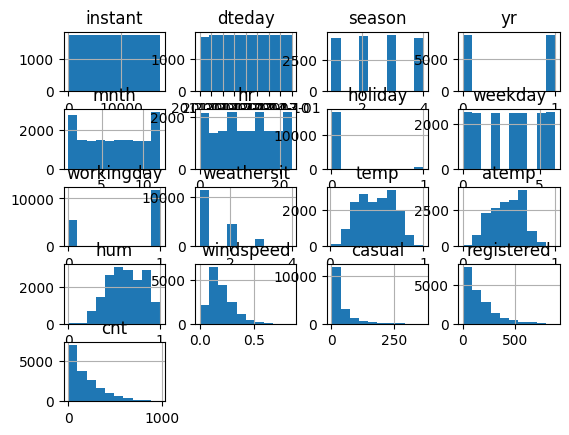

In [33]:
hour_df.hist()

In [34]:
correlation_matrix = day_df.corr()
print(correlation_matrix)

             instant    dteday    season        yr      mnth   holiday  \
instant     1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
dteday      1.000000  1.000000  0.412224  0.866025  0.496702  0.016145   
season      0.412224  0.412224  1.000000 -0.001844  0.831440 -0.010537   
yr          0.866025  0.866025 -0.001844  1.000000 -0.001792  0.007954   
mnth        0.496702  0.496702  0.831440 -0.001792  1.000000  0.019191   
holiday     0.016145  0.016145 -0.010537  0.007954  0.019191  1.000000   
weekday    -0.000016 -0.000016 -0.003080 -0.005461  0.009509 -0.101960   
workingday -0.004337 -0.004337  0.012485 -0.002013 -0.005901 -0.253023   
weathersit -0.021477 -0.021477  0.019211 -0.048727  0.043528 -0.034627   
temp        0.150580  0.150580  0.334315  0.047604  0.220205 -0.028556   
atemp       0.152638  0.152638  0.342876  0.046106  0.227459 -0.032507   
hum         0.016375  0.016375  0.205445 -0.110651  0.222204 -0.015937   
windspeed  -0.112620 -0.112620 -0.2290

In [35]:
hour_df.groupby(by='mnth').agg({
    'casual': ["max","min","mean","std"],
    'registered': ["max","min","mean","std"],
    'cnt': ["max","min","mean","std"]
})

casual                           registered                              \
        max min       mean        std        max min        mean         std   
mnth                                                                           
1       156   0   8.426872  15.151606        518   0   85.997901   91.807469   
2       229   0  11.158091  18.767280        567   0  101.706935  104.438705   
3       367   0  30.172437  46.148230        693   0  125.238289  133.730325   
4       355   0  42.311761  58.621658        697   0  144.949200  144.793339   
5       361   0  50.594758  59.095426        770   1  172.312500  153.165293   
6       297   0  51.323611  54.415890        796   0  189.191667  161.927697   
7       269   0  52.524866  50.278385        790   1  179.295027  158.084166   
8       289   0  48.840000  47.229486        811   0  189.257627  170.903295   
9       350   0  48.937370  59.827156        886   0  191.835769  177.809699   
10      362   0  41.185389  55.847805        876   1  180.973122  171.304657   
11      304   0  25.471816  38.800505        709   0  151.863605  140.268250   
12      167   0  14.627782  20.300784        737   0  127.675657  130.321809   

      cnt                              
      max min        mean         std  
mnth                                   
1     559   1   94.424773   99.907146  
2     610   1  112.865026  112.486565  
3     957   1  155.410726  163.543050  
4     822   1  187.260960  181.137902  
5     873   1  222.907258  187.721497  
6     900   1  240.515278  196.038950  
7     913   1  231.819892  187.483806  
8     941   1  238.097627  200.444648  
9     977   1  240.773138  214.609531  
10    963   1  222.158511  203.477057  
11    729   1  177.335421  158.973887  
12    759   1  142.303439  141.080674

In [36]:
hour_df.groupby(by='season').dteday.nunique().sort_values(ascending=False)

,dteday
season,
3,188
2,184
1,181
4,178


In [37]:
hour_df.groupby(by='yr').dteday.nunique().sort_values(ascending=False)

,dteday
yr,
1,366
0,365


Explore Data day_dg dan hour_df

In [38]:
day_colomns = day_df.columns
print(day_colomns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [39]:
hour_colomns = hour_df.columns
print(hour_colomns)

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


In [74]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

day_hour_df = pd.merge(
    left=day_df,
    right=hour_df,
    how='inner',
    left_on='dteday',
    right_on='dteday'
)

print(day_hour_df.head())

   instant_x     dteday  season_x  yr_x  mnth_x  holiday_x  weekday_x  \
0          1 2011-01-01         1     0       1          0          6   
1          1 2011-01-01         1     0       1          0          6   
2          1 2011-01-01         1     0       1          0          6   
3          1 2011-01-01         1     0       1          0          6   
4          1 2011-01-01         1     0       1          0          6   

   workingday_x  weathersit_x    temp_x  ...  weekday_y  workingday_y  \
0             0             2  0.344167  ...          6             0   
1             0             2  0.344167  ...          6             0   
2             0             2  0.344167  ...          6             0   
3             0             2  0.344167  ...          6             0   
4             0             2  0.344167  ...          6             0   

   weathersit_y  temp_y  atemp_y  hum_y  windspeed_y  casual_y  registered_y  \
0             1    0.24   0.2879   0.81   

In [51]:
day_hour_df.groupby(by=["season_x","season_y"]).dteday.nunique().sort_values(ascending=False)

,,dteday
season_x,season_y,
3,3,188
2,2,184
1,1,181
4,4,178


In [59]:
day_hour_df.groupby(by="dteday").agg({
    'instant_x': ["max","min","mean","std"],
    'casual_x': ["max","min","mean","std"],
    'registered_y': ["max","min","mean","std"],
    'casual_y': ["max","min","mean","std"],
    'registered_y': ["max","min","mean","std"],
    'cnt_y': ["max","min","mean","std"]
})

instant_x                  casual_x                  registered_y  \
                 max  min   mean  std      max  min   mean  std          max   
dteday                                                                         
2011-01-01         1    1    1.0  0.0      331  331  331.0  0.0           71   
2011-01-02         2    2    2.0  0.0      131  131  131.0  0.0           73   
2011-01-03         3    3    3.0  0.0      120  120  120.0  0.0          153   
2011-01-04         4    4    4.0  0.0      108  108  108.0  0.0          202   
2011-01-05         5    5    5.0  0.0       82   82   82.0  0.0          192   
...              ...  ...    ...  ...      ...  ...    ...  ...          ...   
2012-12-27       727  727  727.0  0.0      247  247  247.0  0.0          227   
2012-12-28       728  728  728.0  0.0      644  644  644.0  0.0          238   
2012-12-29       729  729  729.0  0.0      159  159  159.0  0.0          125   
2012-12-30       730  730  730.0  0.0      364  364  364.0  0.0          121   
2012-12-31       731  731  731.0  0.0      439  439  439.0  0.0          246   

                                      casual_y                            \
           min        mean        std      max min       mean        std   
dteday                                                                     
2011-01-01   0   27.250000  21.303705       47   0  13.791667  14.455266   
2011-01-02   1   29.130435  24.589917       20   0   5.695652   6.255432   
2011-01-03   1   55.863636  46.424845       14   0   5.454545   5.040099   
2011-01-04   1   63.217391  58.165091       18   0   4.695652   5.880900   
2011-01-05   2   66.000000  57.419509       12   0   3.565217   3.368653   
...         ..         ...        ...      ...  ..        ...        ...   
2012-12-27   1   77.791667  65.949242       31   0  10.291667  10.564416   
2012-12-28   2  102.125000  76.071655       84   0  26.833333  31.133187   
2012-12-29   3   49.250000  36.582545       22   0   6.625000   6.638573   
2012-12-30   2   59.666667  41.028799       49   0  15.166667  16.672463   
2012-12-31   1   95.416667  71.236237       69   0  18.291667  20.556347   

           cnt_y                             
             max min        mean        std  
dteday                                       
2011-01-01   110   1   41.041667  34.292196  
2011-01-02    93   1   34.826087  29.785067  
2011-01-03   157   1   61.318182  48.792453  
2011-01-04   212   1   67.913043  59.889985  
2011-01-05   195   2   69.565217  58.427753  
...          ...  ..         ...        ...  
2012-12-27   257   1   88.083333  72.027722  
2012-12-28   271   2  128.958333  95.264154  
2012-12-29   147   3   55.875000  41.957859  
2012-12-30   169   2   74.833333  56.244549  
2012-12-31   315   1  113.708333  87.936973  

[731 rows x 20 columns]

**Insight:**
- Melakukan eksplorasi data dan pengelompokkan data berdasarkan bulan dan tahun terhadap jumlah rata-rata sewa sepedah pada dataset day_df
- Melakukan eksplorasi data, melakukan analisis korelasi matrix dan pengelompokkan data berdasarkan bulan dan tahun terhadap mean, min, max, dan std
- Melakukan penggabunyan dua data dan melakukan eksplorasi terhadap data

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Persentase pengguna casual: 18.83%
Persentase pengguna registered: 81.17%


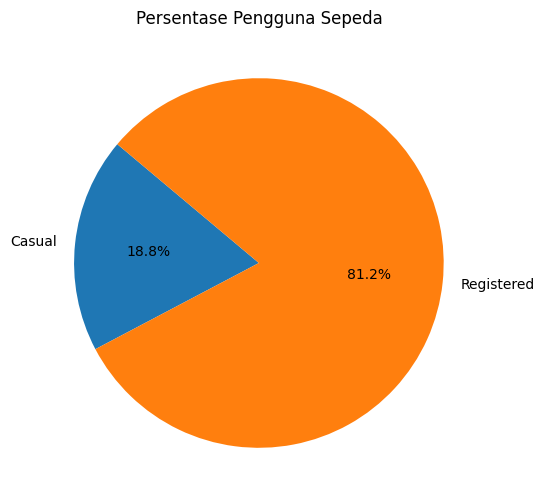

In [78]:
total_pengguna = day_hour_df['cnt_y'].sum()
pengguna_casual = day_hour_df['casual_y'].sum()
pengguna_registered = day_hour_df['registered_y'].sum()

persentase_casual = (pengguna_casual / total_pengguna) * 100
persentase_registered = (pengguna_registered / total_pengguna) * 100

print(f"Persentase pengguna casual: {persentase_casual:.2f}%")
print(f"Persentase pengguna registered: {persentase_registered:.2f}%")

# Visualisasi
labels = ['Casual', 'Registered']
sizes = [persentase_casual, persentase_registered]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Persentase Pengguna Sepeda')
plt.show()

### Pertanyaan 2:

Bulan dengan penyewaan sepeda tertinggi adalah August dengan 351194 penyewa.


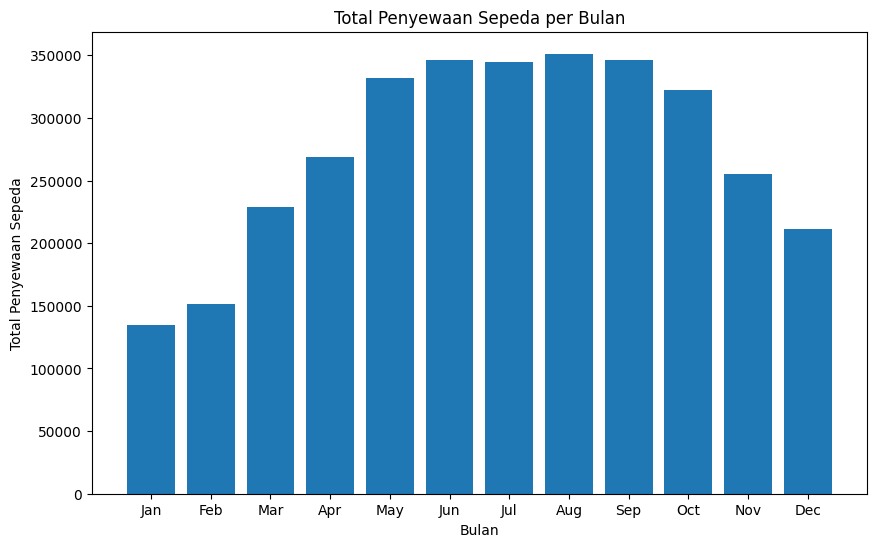

In [81]:
# Ekstrak bulan dari kolom 'dteday'
day_hour_df['bulan'] = pd.to_datetime(day_hour_df['dteday']).dt.month

# Kelompokkan data berdasarkan bulan dan hitung total penyewaan
grouped_bulan = day_hour_df.groupby('bulan')['cnt_y'].sum()

# Temukan bulan dengan total penyewaan tertinggi
bulan_tertinggi = grouped_bulan.idxmax()
total_penyewaan_tertinggi = grouped_bulan.max()

# Konversi angka bulan ke nama bulan
nama_bulan = pd.to_datetime(bulan_tertinggi, format='%m').strftime('%B')

print(f"Bulan dengan penyewaan sepeda tertinggi adalah {nama_bulan} dengan {total_penyewaan_tertinggi} penyewa.")

# Visualisasi
plt.figure(figsize=(10, 6))
plt.bar(grouped_bulan.index, grouped_bulan.values)
plt.title('Total Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penyewaan Sepeda')
plt.xticks(grouped_bulan.index, pd.to_datetime(grouped_bulan.index, format='%m').strftime('%b'))
plt.show()

**Insight:**
- Menurut analisis yang telah dilakukan, persentase penggunaan sepeda pada beberapa bulan terakhir adalah 18,8% pengguna cansual dan 81,2% pengguna registerd
- Menurut perhitungan puncak penyewaan sepeda pada satu tahun terakhir berada pada bulan agustus sebanyak 351194 pengguna

## Conclusion

- Dalam data day_df dan hour_df memiliki kesamaan yang dimana terdapat perbaikan tipe data pada kolom dteday dan juga memiliki data outlier yang harus diperbaiki.
- Dilakukan eksplorasi data pada dataset dan juga penggabungan data. Sehingga, dapat ditemukan hasil dari persentase penggunaan sepeda yakni 18,8% pengguna cansual dan 81,2% pengguna registed. Puncak penyewaan sepeda dalam satu tahun terakhir ada pada bulan agustus sebanyak 351194.